In [3]:
from bunkatech.topic_modeling.nested_topics import NestedTopicModeling
import pandas as pd

In [7]:
data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

data = data.sample(5000)

In [8]:
#folding_1 = ["war", "world", "warrior"]
#folding = [folding_1]

In [10]:
nested = NestedTopicModeling(data=data, text_var="description", index_var="imdb")

# add an option to load existing embeddingd withing BasicSemantics


nested.fit(
    folding=None,
    docs_embedding_model="distiluse-base-multilingual-cased-v1",
    extract_terms=True,
    terms_embedding=False,
    sample_size_terms=3000,
    terms_limit=3000,
    terms_ents=False,
    terms_ngrams=(2, 2),
    terms_ncs=False,
    terms_include_pos=["NOUN", "PROPN", "ADJ"],
    terms_include_types=["PERSON", "ORG"],
    terms_embedding_model="distiluse-base-multilingual-cased-v1",
    language="en",
)


Extract Terms: 100%|████████████████████████████████████████████| 3000/3000 [00:27<00:00, 107.34it/s]


Batches:   0%|          | 0/156 [00:00<?, ?it/s]

UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=10, verbose=True)
Wed Mar 16 20:45:34 2022 Construct fuzzy simplicial set
Wed Mar 16 20:45:34 2022 Finding Nearest Neighbors
Wed Mar 16 20:45:34 2022 Building RP forest with 9 trees
Wed Mar 16 20:45:34 2022 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	 8  /  12
	Stopping threshold met -- exiting after 8 iterations
Wed Mar 16 20:45:51 2022 Finished Nearest Neighbor Search
Wed Mar 16 20:45:52 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Mar 16 20:45:57 2022 Finished embedding


In [ ]:
nested.visualize_embeddings(nested_level=1)

In [7]:
centroid = nested.get_centroid_documents(nested_level=0, top_elements = 3)

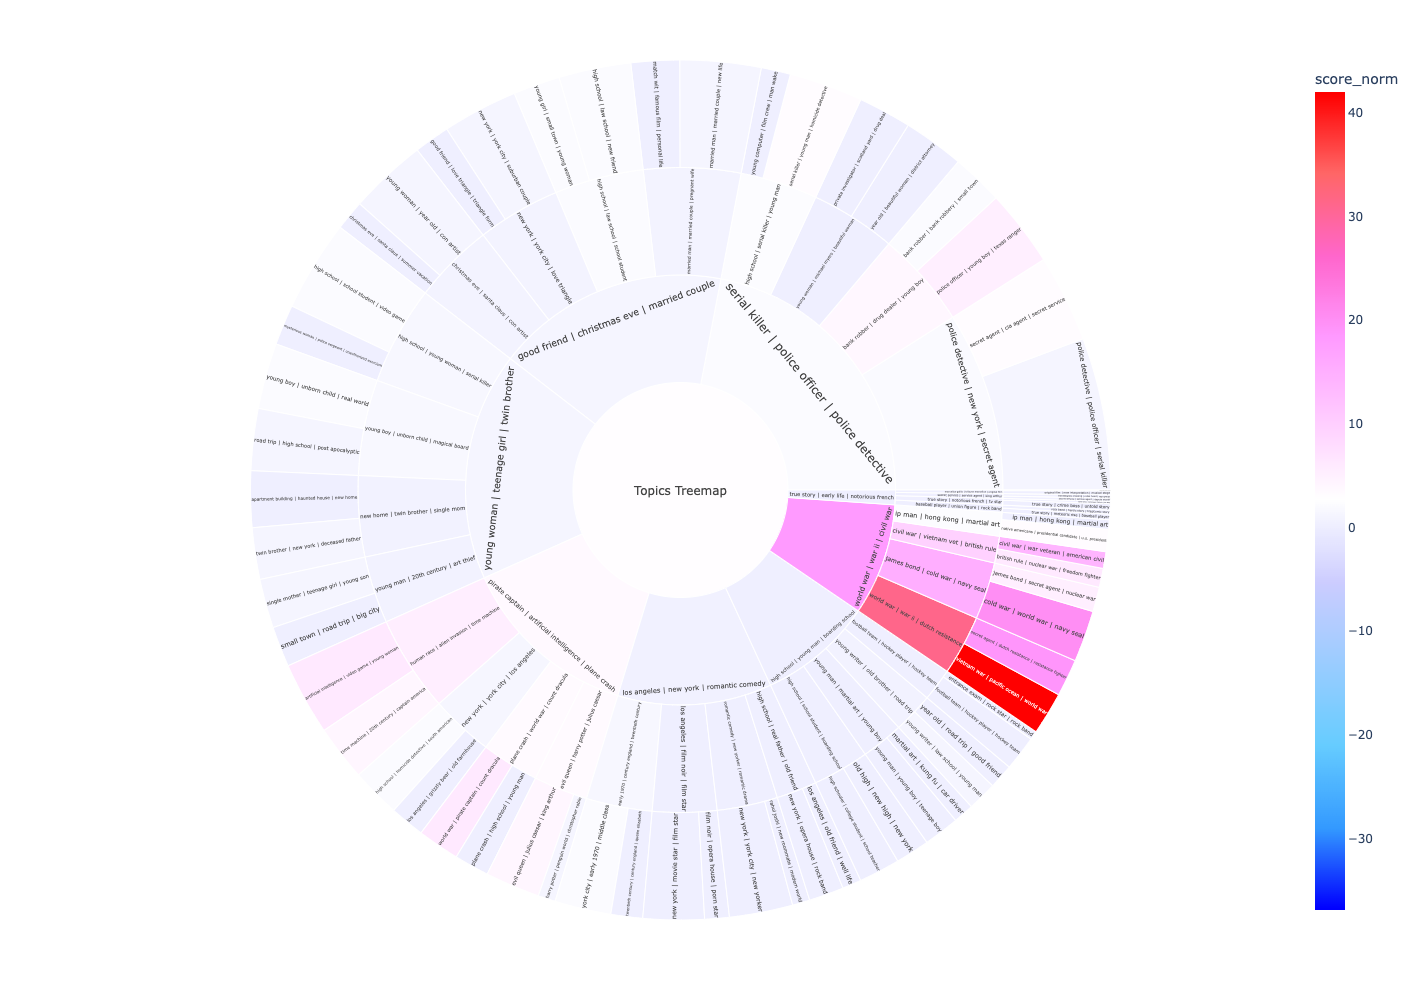

In [15]:
fig = nested.nested_maps(
        size_rule="docs_size",
        map_type="sunburst",
        width=1000,
        height=1000,
        query=['war'])

fig.show()